<a href="https://colab.research.google.com/github/SolarHO/FloodDamage_BigData/blob/main/%EC%B9%A8%EC%88%98%ED%9D%94%EC%A0%81%EB%8F%84/%EC%B9%A8%EC%88%98%ED%9D%94%EC%A0%81%EB%8F%84_%ED%86%B5%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4. 침수흔적도 통계

In [ ]:
# GeoDataFrame으로 shp 파일 읽기
gdf = gpd.read_file("FloodMap.shp")

#geojson 형식으로 변환(좌표계를 4326)
gdf = gdf.to_crs(epsg=4326)
geojson_data = gdf.to_json()

# geojson_data를 파일로 저장
with open("FloodMap.geojson", "w", encoding="utf-8") as f:
    json.dump(json.loads(geojson_data), f, ensure_ascii=False, indent=4)

4-1. 구 별 침수피해 발생 건수 비교

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


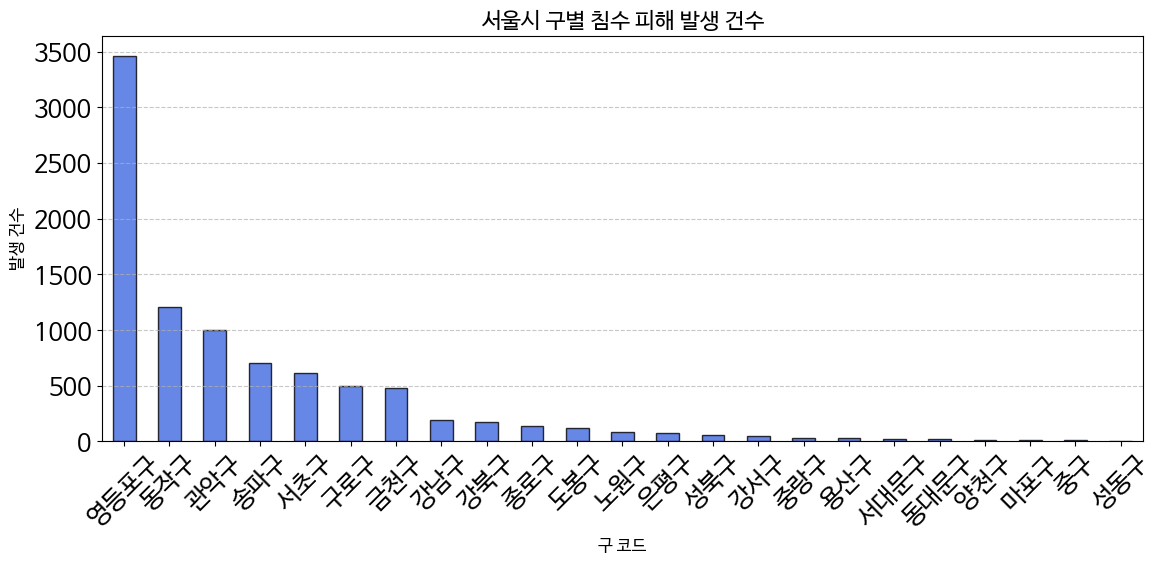

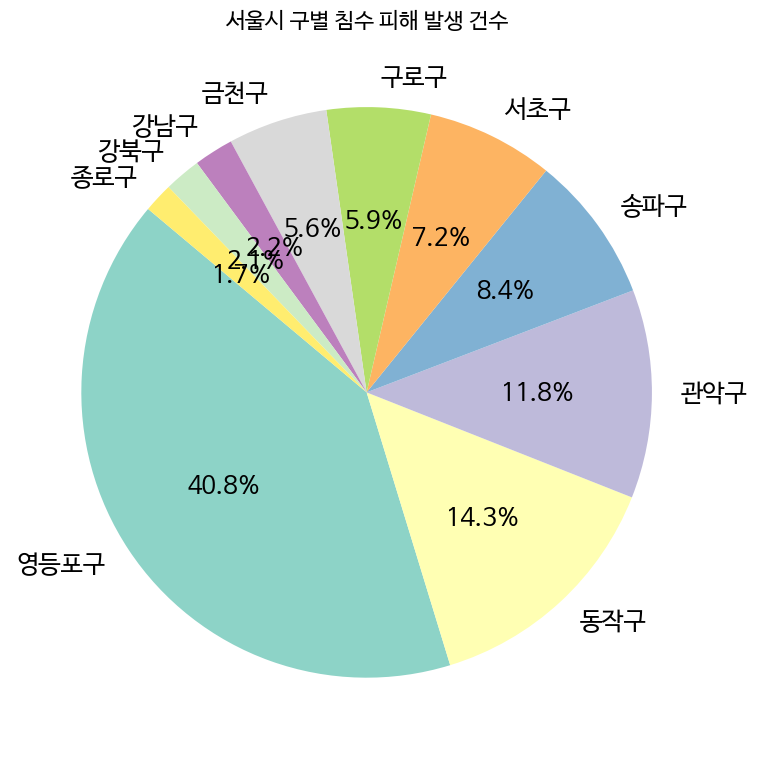

In [ ]:
import matplotlib.pyplot as plt

# 서울시 데이터 필터링
seoul_data = gdf[gdf["CTPRVN_CD"] == "11"]

# 서울시 시군구 코드와 명칭 매핑
sgg_cd_to_name = {
    "11110": "종로구",
    "11140": "중구",
    "11170": "용산구",
    "11200": "성동구",
    "11215": "광진구",
    "11230": "동대문구",
    "11260": "중랑구",
    "11290": "성북구",
    "11305": "강북구",
    "11320": "도봉구",
    "11350": "노원구",
    "11380": "은평구",
    "11410": "서대문구",
    "11440": "마포구",
    "11470": "양천구",
    "11500": "강서구",
    "11530": "구로구",
    "11545": "금천구",
    "11560": "영등포구",
    "11590": "동작구",
    "11620": "관악구",
    "11650": "서초구",
    "11680": "강남구",
    "11710": "송파구",
    "11740": "종로구"
}

# SGG_CD를 구 이름으로 변환
seoul_data["SGG_Name"] = seoul_data["SGG_CD"].map(sgg_cd_to_name)

# 구별 침수 피해 발생 건수 계산
seoul_damage_count = seoul_data["SGG_Name"].value_counts()

# 정렬 (선택 사항)
seoul_damage_count = seoul_damage_count.sort_values(ascending=False)

# 시각화: 막대 그래프
plt.figure(figsize=(12, 6))
seoul_damage_count.plot(kind="bar", color="royalblue", edgecolor="black", alpha=0.8)
plt.title("서울시 구별 침수 피해 발생 건수", fontsize=16)
plt.ylabel("발생 건수", fontsize=12)
plt.xlabel("구 코드", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 시각화: 원형 그래프 (상위 10개 구만 표시)
plt.figure(figsize=(8, 8))
seoul_damage_count.head(10).plot(
    kind="pie", autopct="%1.1f%%", startangle=140, cmap="Set3"
)
plt.title("서울시 구별 침수 피해 발생 건수", fontsize=16)
plt.ylabel("")  # y축 제거
plt.tight_layout()
plt.show()

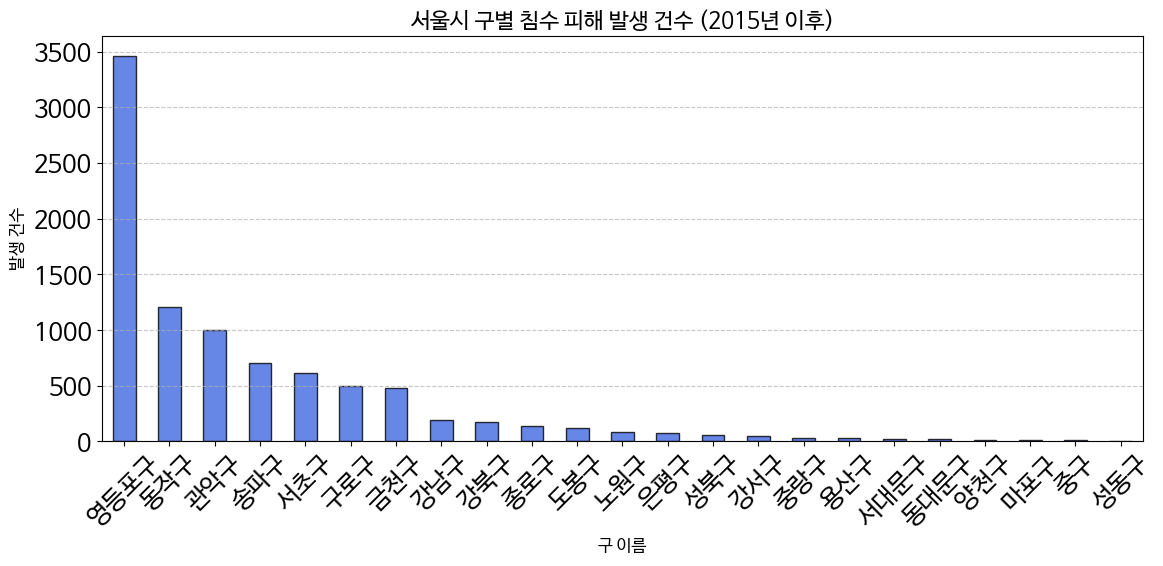

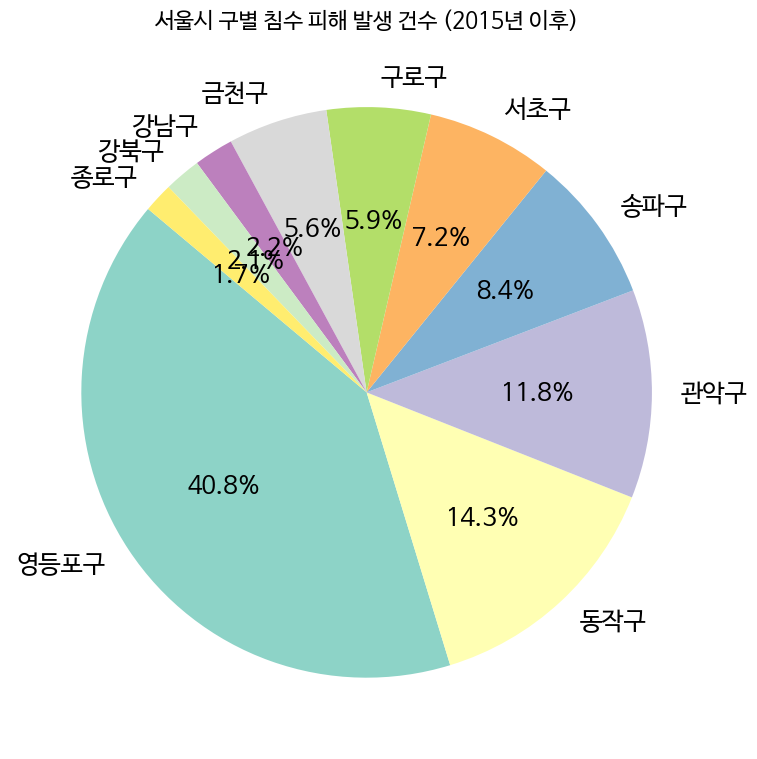

In [ ]:
import matplotlib.pyplot as plt

# 연도 기준 필터링: 2015년부터
filtered_data = seoul_data[seoul_data["FLUD_YEAR"].astype(int) >= 2015]

# 구별 침수 피해 발생 건수 계산
filtered_damage_count = filtered_data["SGG_Name"].value_counts()
filtered_damage_count = filtered_damage_count.sort_values(ascending=False)

# 시각화: 막대 그래프
plt.figure(figsize=(12, 6))
filtered_damage_count.plot(kind="bar", color="royalblue", edgecolor="black", alpha=0.8)
plt.title("서울시 구별 침수 피해 발생 건수 (2015년 이후)", fontsize=16)
plt.ylabel("발생 건수", fontsize=12)
plt.xlabel("구 이름", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 시각화: 원형 그래프 (상위 10개 구만 표시)
plt.figure(figsize=(8, 8))
filtered_damage_count.head(10).plot(
    kind="pie", autopct="%1.1f%%", startangle=140, cmap="Set3"
)
plt.title("서울시 구별 침수 피해 발생 건수 (2015년 이후)", fontsize=16)
plt.ylabel("")  # y축 제거
plt.tight_layout()
plt.show()


4-2. 구 별 침수피해 면적 비교

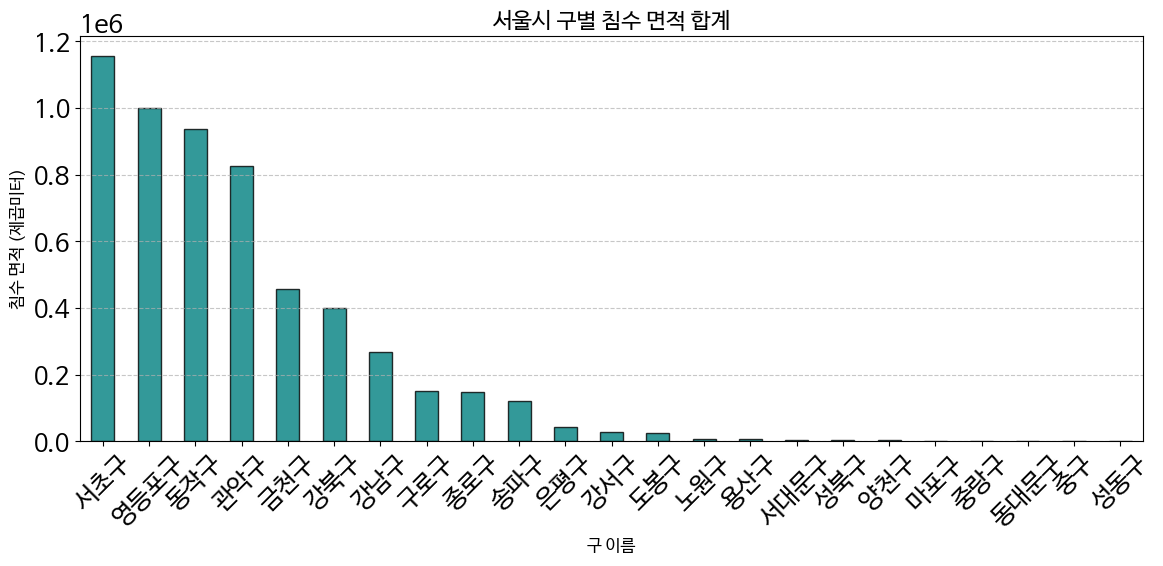

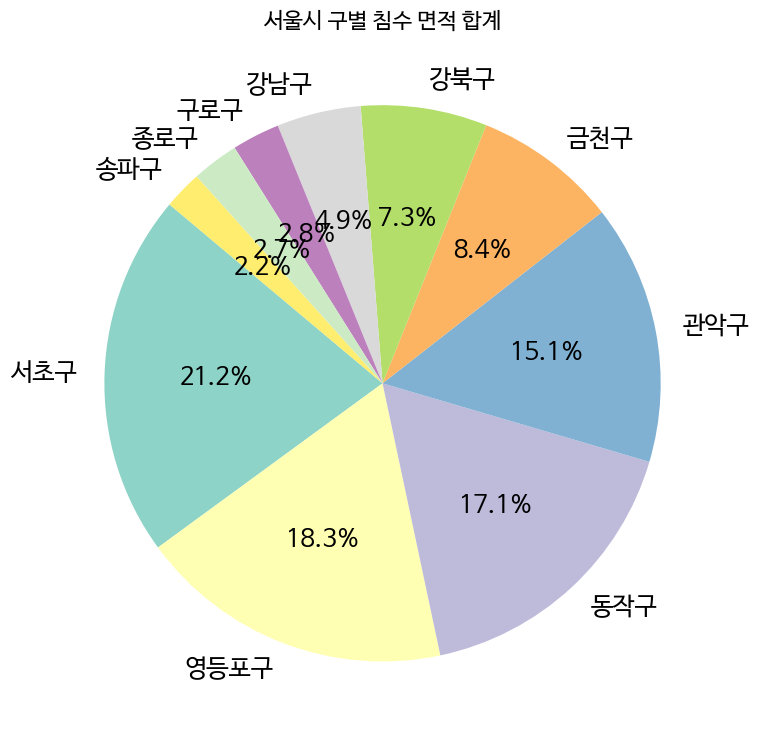

In [ ]:
import matplotlib.pyplot as plt

# 구별 침수 면적 합계 계산
seoul_area_sum = seoul_data.groupby("SGG_Name")["FLUD_AR"].sum()

# 구별 침수 면적 합계 정렬
seoul_area_sum = seoul_area_sum.sort_values(ascending=False)

# 시각화: 막대 그래프
plt.figure(figsize=(12, 6))
seoul_area_sum.plot(kind="bar", color="teal", edgecolor="black", alpha=0.8)
plt.title("서울시 구별 침수 면적 합계", fontsize=16)
plt.ylabel("침수 면적 (제곱미터)", fontsize=12)
plt.xlabel("구 이름", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 시각화: 원형 그래프 (상위 10개 구만 표시)
plt.figure(figsize=(8, 8))
seoul_area_sum.head(10).plot(
    kind="pie", autopct="%1.1f%%", startangle=140, cmap="Set3"
)
plt.title("서울시 구별 침수 면적 합계", fontsize=16)
plt.ylabel("")  # y축 제거
plt.tight_layout()
plt.show()


4-3. 구 별 평균 침수 심도 비교

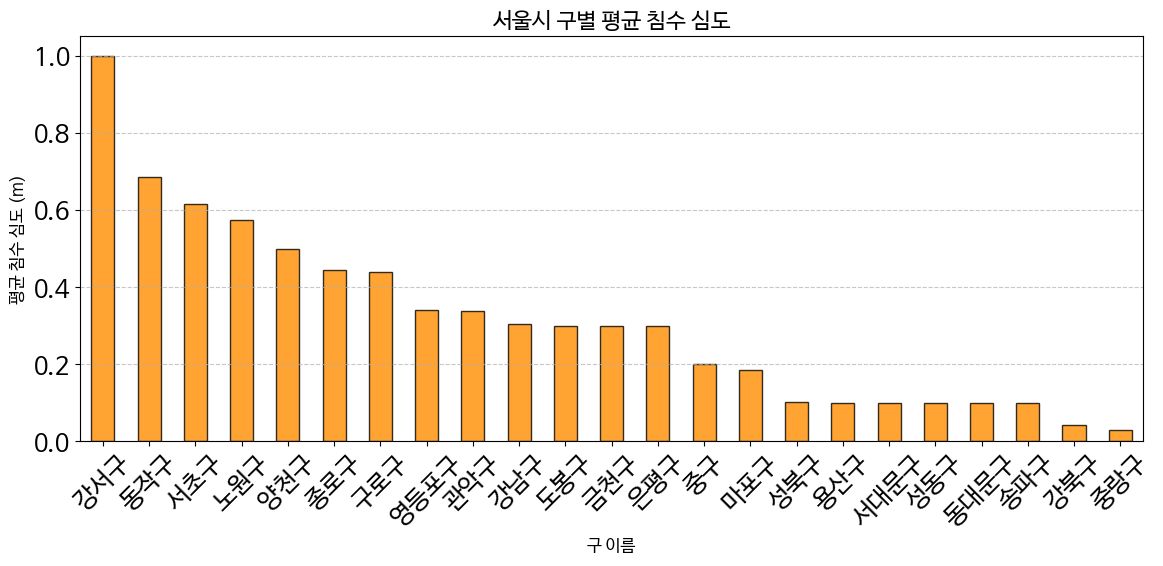

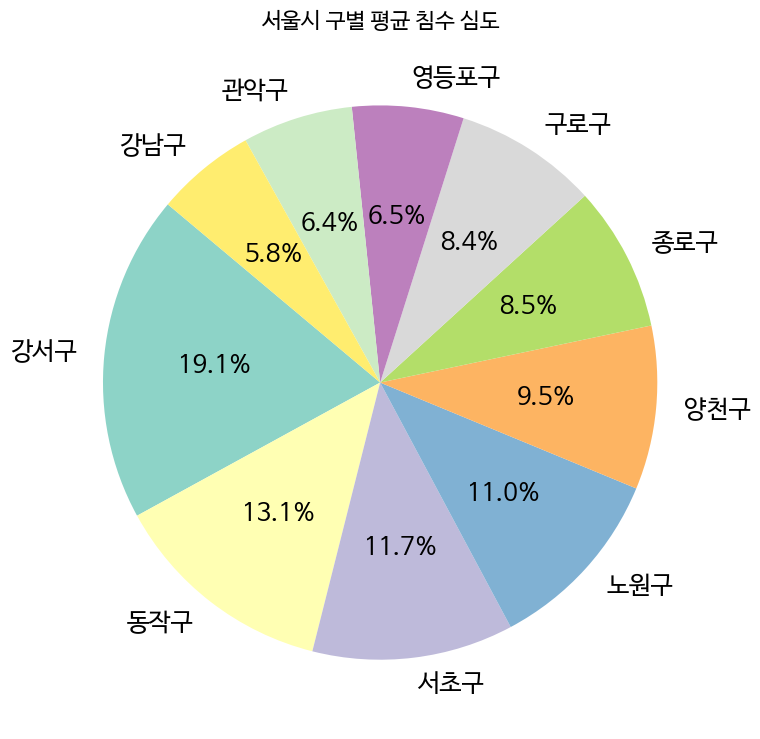

In [ ]:
import matplotlib.pyplot as plt

# 구별 평균 침수 심도 계산
seoul_avg_flood_depth = seoul_data.groupby("SGG_Name")["FLUD_SHIM"].mean()

# 구별 평균 침수 심도 정렬
seoul_avg_flood_depth = seoul_avg_flood_depth.sort_values(ascending=False)

# 시각화: 막대 그래프
plt.figure(figsize=(12, 6))
seoul_avg_flood_depth.plot(kind="bar", color="darkorange", edgecolor="black", alpha=0.8)
plt.title("서울시 구별 평균 침수 심도", fontsize=16)
plt.ylabel("평균 침수 심도 (m)", fontsize=12)
plt.xlabel("구 이름", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 시각화: 원형 그래프 (상위 10개 구만 표시)
plt.figure(figsize=(8, 8))
seoul_avg_flood_depth.head(10).plot(
    kind="pie", autopct="%1.1f%%", startangle=140, cmap="Set3"
)
plt.title("서울시 구별 평균 침수 심도", fontsize=16)
plt.ylabel("")  # y축 제거
plt.tight_layout()
plt.show()
